# **MODELLING PHASE**

The focus of this project involves addressing a linear and continuous challenge. Our objective will be to explore various linear model algorithms in order to identify the models that deliver the most optimal performance.

In [1]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')


In [2]:
df= pd.read_csv("/content/Scaled_Upper_Secondary_edu.csv")

In [3]:
print(df.shape)
df.head()

(1876, 17)


,Year,Completion Rate for upper secondary Edu,Childhood Education GER,"Gross enrolment ratio, early childhood educational development programmes",Literacy rate for 25-64 years old,Expenditure on education as a percentage of total government expenditure (%),Government expenditure on education as a percentage of GDP (%),Central Asia,Central and Southern Asia,Eastern and South-Eastern Asia,Europe and Northern America,Latin America and the Caribbean,Northern Africa and Western Asia,Oceania,Southern Asia,Sub-Saharan Africa,Gender_numerical
0,2012,96.9,47.348558,5.871662,68.735,19.25,3.90,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,2012,96.2,47.348558,5.871662,68.735,19.25,3.90,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2013,97.0,47.348558,5.871662,68.735,17.96,3.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2013,96.4,47.348558,5.871662,68.735,17.96,3.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,2014,97.2,36.650000,0.000000,68.735,17.32,3.42,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


**Data Transformation**

It has been noticed that the data values within our dataset are not standardized on the same scale. In order to enhance the robustness of our model, we will apply a MinMax scaler to normalize the dataset.

In [4]:
# Set the year column as index
data_col = df['Year']
df.set_index('Year',inplace =True)

df.head()
# Data Rescaling using MinMax Scaler


,Completion Rate for upper secondary Edu,Childhood Education GER,"Gross enrolment ratio, early childhood educational development programmes",Literacy rate for 25-64 years old,Expenditure on education as a percentage of total government expenditure (%),Government expenditure on education as a percentage of GDP (%),Central Asia,Central and Southern Asia,Eastern and South-Eastern Asia,Europe and Northern America,Latin America and the Caribbean,Northern Africa and Western Asia,Oceania,Southern Asia,Sub-Saharan Africa,Gender_numerical
Year,,,,,,,,,,,,,,,,
2012,96.9,47.348558,5.871662,68.735,19.25,3.90,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2012,96.2,47.348558,5.871662,68.735,19.25,3.90,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2013,97.0,47.348558,5.871662,68.735,17.96,3.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2013,96.4,47.348558,5.871662,68.735,17.96,3.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2014,97.2,36.650000,0.000000,68.735,17.32,3.42,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [5]:
# Data Rescaling using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

normalized_df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
normalized_df['Year'] = data_col
normalized_df.set_index('Year', inplace =True)
normalized_df

,Completion Rate for upper secondary Edu,Childhood Education GER,"Gross enrolment ratio, early childhood educational development programmes",Literacy rate for 25-64 years old,Expenditure on education as a percentage of total government expenditure (%),Government expenditure on education as a percentage of GDP (%),Central Asia,Central and Southern Asia,Eastern and South-Eastern Asia,Europe and Northern America,Latin America and the Caribbean,Northern Africa and Western Asia,Oceania,Southern Asia,Sub-Saharan Africa,Gender_numerical
Year,,,,,,,,,,,,,,,,
2012,0.985625,0.291174,0.062772,0.657782,0.482729,0.286765,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2012,0.978437,0.291174,0.062772,0.657782,0.482729,0.286765,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013,0.986652,0.291174,0.062772,0.657782,0.446206,0.252941,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2013,0.980491,0.291174,0.062772,0.657782,0.446206,0.252941,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014,0.988705,0.224366,0.000000,0.657782,0.428086,0.251471,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,0.092309,0.431373,0.000000,0.657782,0.476784,0.150735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2019,0.110997,0.442238,0.000000,0.657782,0.361780,0.302466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2019,0.160899,0.444361,0.000000,0.657782,0.361780,0.302466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


 **Spliting the dataset into train set, and test set:**

In [6]:
from sklearn.model_selection import train_test_split


# spliting the dataset into train set, test set, validation set.
X = normalized_df.drop('Completion Rate for upper secondary Edu', axis = 1)
y = normalized_df['Completion Rate for upper secondary Edu']

train_ratio = 0.80
test_ratio = 0.20

# Spliting the dataset into training and test, with test_size=0.20% and train_size=80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_ratio, random_state=42)


print("The dimensions of the feature variables within the split dataset are as follows:", X_train.shape,X_test.shape)
print("The dimensions of the target variables within the split dataset are as follows:", y_train.shape, y_test.shape)

The dimensions of the feature variables within the split dataset are as follows: (1500, 15) (376, 15)
The dimensions of the target variables within the split dataset are as follows: (1500,) (376,)


# **Model Building**

**Model 1(Linear Regression)**

In [7]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [8]:
import time
# Record start time
start_time = time.time()

# Fit the model to the training dataset
linear_model.fit(X_train, y_train)

# Record end time
end_time = time.time()

# Calculate elapsed time
elapsed_time = end_time - start_time

# Display training time
print("The traning time for Model_1(Linear Regression) is {:.2f} seconds.".format(elapsed_time))

The traning time for Model_1(Linear Regression) is 0.01 seconds.


In [9]:
# Obtain predictions
predicted_values = linear_model.predict(X_test)

#Measuring regression performance
MAE = mean_absolute_error(y_test, predicted_values)
MSE = mean_squared_error(y_test, predicted_values)
RMSE =np.sqrt(mean_squared_error(y_test, predicted_values))
RSS =np.sum(np.square(y_test, predicted_values))
r2=r2_score(y_test, predicted_values)

In [10]:
Prediction_Comparison = pd.DataFrame(data ={"actual_values": y_test, "predictions":predicted_values})
Prediction_Comparison.head()

,actual_values,predictions
Year,,
2018,0.196016,0.038422
2012,0.163158,0.026621
2019,0.842900,0.710480
2018,0.152890,0.023375
2014,0.337714,0.114051


In [11]:
# Model evaluation
results = pd.DataFrame([['Linear regression', MAE, MSE, RMSE, RSS,r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'RSS','r2_score'])
results

,Model,MAE,MSE,RMSE,RSS,r2_score
0,Linear regression,0.161718,0.042506,0.206171,117.86372,0.664007


Model 1(Linear Regression) Result comunication

In [12]:
# Get feature names from training data
features = X_train.columns
# Extract importances from Model_1
importances= linear_model.coef_.round(2)

# Create a series with feature names and importances
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)
feat_imp.head(17)

Literacy rate for 25-64 years old                                               3.700000e-01
Gross enrolment ratio, early childhood educational development programmes       2.300000e-01
Expenditure on education as a percentage of total government expenditure (%)    1.100000e-01
Government expenditure on education as a percentage of GDP (%)                  1.000000e-01
Gender_numerical                                                                3.000000e-02
Childhood Education GER                                                         1.000000e-02
Central Asia                                                                   -9.752120e+12
Europe and Northern America                                                    -9.752120e+12
Northern Africa and Western Asia                                               -9.752120e+12
Central and Southern Asia                                                      -9.752120e+12
Eastern and South-Eastern Asia                                        

In [13]:
# Convert the Series into a DataFrame
feat_imp = pd.DataFrame({'Column_Name': feat_imp})
# Rename columns using the rename() method
new_column_names = {'Column_Name': 'Importances'}
feat_imp.rename(columns=new_column_names, inplace=True)
feat_imp.head(17)

,Importances
Literacy rate for 25-64 years old,3.700000e-01
"Gross enrolment ratio, early childhood educational development programmes",2.300000e-01
Expenditure on education as a percentage of total government expenditure (%),1.100000e-01
Government expenditure on education as a percentage of GDP (%),1.000000e-01
Gender_numerical,3.000000e-02
Childhood Education GER,1.000000e-02
Central Asia,-9.752120e+12
Europe and Northern America,-9.752120e+12
Northern Africa and Western Asia,-9.752120e+12
Central and Southern Asia,-9.752120e+12


Model 1(Linear Regression) Result interpretation:we observe that the following factors hold the highest importance in predicting the school completion rate: gross intake ratio to the last grade, CountryLiteracy rate for 25-64 years old and government expenditure on education as a percentage of GDP.

**Model 2(Decison Tree Regressor**)

In [14]:
from sklearn.tree import DecisionTreeRegressor

In [15]:
# Record start time
start_time = time.time()
DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(X_train,y_train)

# Record end time
end_time = time.time()

# Calculate elapsed time
elapsed_time = end_time - start_time

# Display training time
print("Training took {:.2f} seconds.".format(elapsed_time))

Training took 0.01 seconds.


In [16]:
# Obtain predictions
predicted_values2 = DecisionTree_model.predict(X_test)
Prediction_Comparison2 = pd.DataFrame(data ={"actual_values": y_test, "predictions":predicted_values2})

Prediction_Comparison2.head()

,actual_values,predictions
Year,,
2018,0.196016,0.876784
2012,0.163158,0.279289
2019,0.842900,0.838176
2018,0.152890,0.138515
2014,0.337714,0.355170


In [17]:
# Model Evaluation
mae2= mean_absolute_error(y_test, predicted_values2)
mse2= mean_squared_error(y_test, predicted_values2)
rmse2=np.sqrt(mean_squared_error(y_test, predicted_values2))
rss2=np.sum(np.square(y_test, predicted_values2))
r_squared2=r2_score(y_test, predicted_values2)

model_results_2= pd.DataFrame([['Decision Tree Regressor', mae2, mse2, rmse2, rss2,r_squared2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'RSS','r2_score'])

model_results_2.head()

,Model,MAE,MSE,RMSE,RSS,r2_score
0,Decision Tree Regressor,0.072284,0.020545,0.143336,117.86372,0.664007


In [18]:
# Get feature names from training data
features = X_train.columns
# Extract importances from Model_1
importances= DecisionTree_model.feature_importances_.round(2)

# Create a series with feature names and importances
feat_imp2 = pd.Series(importances, index=features).sort_values(ascending=False)

# Convert the Series into a DataFrame
feat_imp2 = pd.DataFrame({'Column_Name': feat_imp2})
# Rename columns using the rename() method
new_column_names = {'Column_Name': 'Importances'}
feat_imp2.rename(columns=new_column_names, inplace=True)
feat_imp2.head(14)

,Importances
Sub-Saharan Africa,0.37
Government expenditure on education as a percentage of GDP (%),0.14
Europe and Northern America,0.11
Childhood Education GER,0.08
"Gross enrolment ratio, early childhood educational development programmes",0.06
Expenditure on education as a percentage of total government expenditure (%),0.06
Central Asia,0.04
Literacy rate for 25-64 years old,0.03
Central and Southern Asia,0.02
Northern Africa and Western Asia,0.02


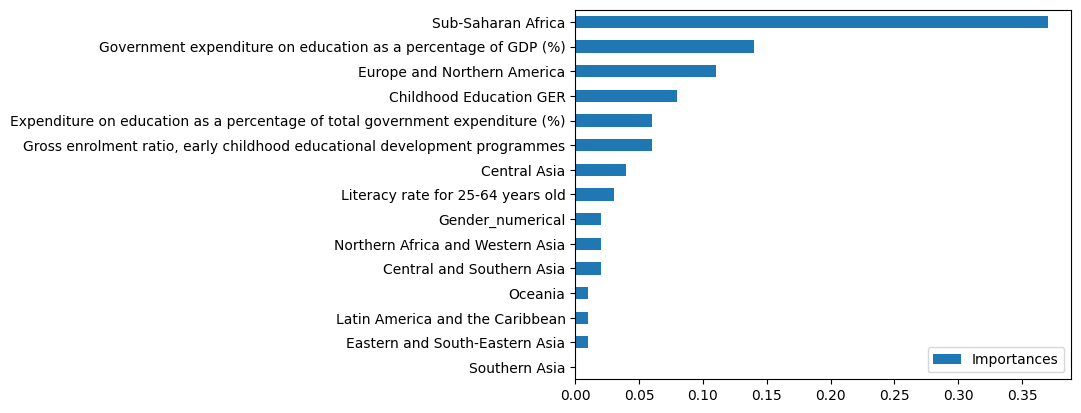

In [19]:
feat_imp2.sort_values(by='Importances', ascending=True).plot(kind='barh');

Interpreting the results from Model 2 (Decision Tree), we observe that the following factors hold the highest importance in predicting the school completion rate within the region of Sub-Saharan Africa: gross intake ratio to the last grade and government expenditure on education as a percentage of GDP. This trend is visually depicted in the plot provided above.


**Model 3 (Random Forest Regressor)**


In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
# Record start time
start_time = time.time()
# Create the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the model
rf_regressor.fit(X_train, y_train)

# Record end time
end_time = time.time()

# Calculate elapsed time
elapsed_time = end_time - start_time

# Display training time
print("Training took {:.2f} seconds.".format(elapsed_time))
# Obtain predictions
predicted_values3 = rf_regressor.predict(X_test)

#Measuring regression performance
MAE3 = mean_absolute_error(y_test, predicted_values3)
MSE3 = mean_squared_error(y_test, predicted_values3)
RMSE3 =np.sqrt(mean_squared_error(y_test, predicted_values3))
RSS3 =np.sum(np.square(y_test, predicted_values3))
r3=r2_score(y_test, predicted_values3)

model_results_3 = pd.DataFrame([['Random Forest Regressor', MAE3, MSE3, RMSE3, RSS3, r3]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'RSS','r2_score'])
model_results_3.head()

Training took 0.45 seconds.


,Model,MAE,MSE,RMSE,RSS,r2_score
0,Random Forest Regressor,0.067228,0.014319,0.11966,117.86372,0.664007


In [22]:
# Get feature names from training data
features = X_train.columns
# Extract importances from the Model
importances= rf_regressor.feature_importances_.round(2)


# Create a series with feature names and importances
feat_imp3 = pd.Series(importances, index=features).sort_values(ascending=False)

# Convert the Series into a DataFrame
feat_imp3 = pd.DataFrame({'Column_Name': feat_imp3})
# Rename columns using the rename() method
new_column_names = {'Column_Name': 'Importances'}
feat_imp3.rename(columns=new_column_names, inplace=True)
feat_imp3.head(14)


,Importances
Sub-Saharan Africa,0.37
Government expenditure on education as a percentage of GDP (%),0.14
Europe and Northern America,0.10
Childhood Education GER,0.08
"Gross enrolment ratio, early childhood educational development programmes",0.08
Expenditure on education as a percentage of total government expenditure (%),0.06
Literacy rate for 25-64 years old,0.03
Central Asia,0.03
Central and Southern Asia,0.02
Eastern and South-Eastern Asia,0.02


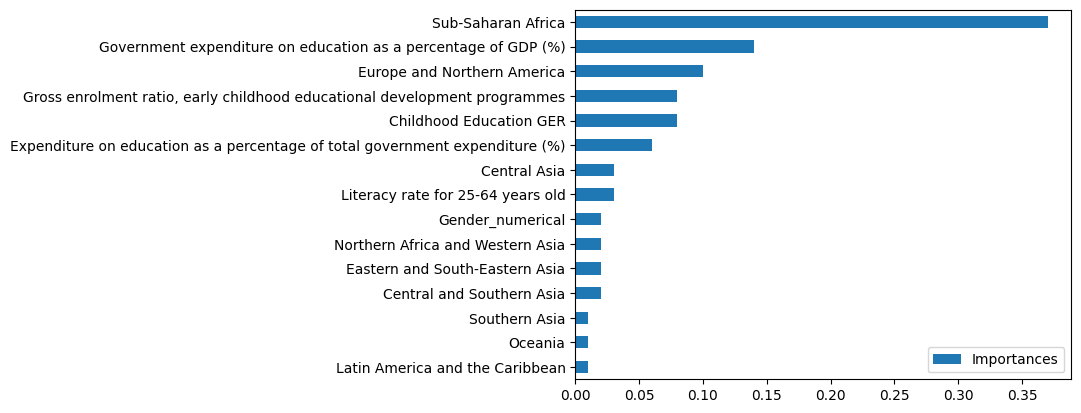

In [23]:
feat_imp3.sort_values(by='Importances', ascending=True).plot(kind='barh');

Result Interpretation: Model 3(Random Forest Regressor) has similar result with Model 2(Decision Tree Regressor)

**Model 4 (K-Nearest Neighbors Regressor (KNN Regression))**



In [24]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [25]:

# Record start time
start_time = time.time()
knn = KNeighborsRegressor()

knn.fit(X_train, y_train)

# Record end time
end_time = time.time()

# Calculate elapsed time
elapsed_time = end_time - start_time

# Display training time
print("Training took {:.2f} seconds.".format(elapsed_time))

Training took 0.00 seconds.


In [26]:

# Obtain predictions
predicted_values4 = knn.predict(X_test)
Prediction_Comparison4 = pd.DataFrame(data ={"actual_values": y_test, "predictions":predicted_values3})

Prediction_Comparison4.head()

,actual_values,predictions
Year,,
2018,0.196016,0.038422
2012,0.163158,0.026621
2019,0.842900,0.710480
2018,0.152890,0.023375
2014,0.337714,0.114051


In [27]:
# Model Evaluation
mae4= mean_absolute_error(y_test, predicted_values4)
mse4= mean_squared_error(y_test, predicted_values4)
rmse4=np.sqrt(mean_squared_error(y_test, predicted_values4))
rss4=np.sum(np.square(y_test, predicted_values4))
r_squared4=r2_score(y_test, predicted_values4)

model_results_4= pd.DataFrame([['K-Nearest Neighbors Regressor', mae4, mse4, rmse4, rss4,r_squared4]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'RSS','r2_score'])
model_results_4.head()

,Model,MAE,MSE,RMSE,RSS,r2_score
0,K-Nearest Neighbors Regressor,0.093371,0.02366,0.153818,117.86372,0.664007


**Model 5(Gradient Boosting Regressor)**

In [28]:
from sklearn.ensemble import GradientBoostingRegressor
Gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)

In [29]:

# Record start time
start_time = time.time()
#Fit the training data
Gbr.fit(X_train,y_train)
# Record end time
end_time = time.time()

# Calculate elapsed time
elapsed_time = end_time - start_time

# Display training time
print("Training took {:.2f} seconds.".format(elapsed_time))



Training took 0.19 seconds.


In [30]:

# Obtain predictions
predicted_values5= Gbr.predict(X_test)
Prediction_Comparison5 = pd.DataFrame(data ={"actual_values": y_test, "predictions":predicted_values4})

Prediction_Comparison5.head()

,actual_values,predictions
Year,,
2018,0.196016,0.038422
2012,0.163158,0.026621
2019,0.842900,0.710480
2018,0.152890,0.023375
2014,0.337714,0.114051


In [31]:
# Model Evaluation
mae5= mean_absolute_error(y_test, predicted_values5)
mse5= mean_squared_error(y_test, predicted_values5)
rmse5=np.sqrt(mean_squared_error(y_test, predicted_values5))
rss5=np.sum(np.square(y_test, predicted_values5))
r_squared5=r2_score(y_test, predicted_values5)

model_results_5= pd.DataFrame([['Gradient Boosting Regressor', mae5, mse5, rmse5, rss5,r_squared5]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'RSS','r2_score'])
model_results_5.head()

,Model,MAE,MSE,RMSE,RSS,r2_score
0,Gradient Boosting Regressor,0.104546,0.019774,0.140621,117.86372,0.664007


In [32]:
# Get feature names from training data
features = X_train.columns
# Extract importances from the Model
importances= Gbr.feature_importances_.round(2)


# Create a series with feature names and importances
feat_imp4 = pd.Series(importances, index=features).sort_values(ascending=False)

# Convert the Series into a DataFrame
feat_imp4 = pd.DataFrame({'Column_Name': feat_imp4})
# Rename columns using the rename() method
new_column_names = {'Column_Name': 'Importances'}
feat_imp4.rename(columns=new_column_names, inplace=True)
feat_imp4.head(14)

,Importances
Sub-Saharan Africa,0.43
Government expenditure on education as a percentage of GDP (%),0.13
"Gross enrolment ratio, early childhood educational development programmes",0.10
Europe and Northern America,0.10
Central Asia,0.05
Childhood Education GER,0.03
Literacy rate for 25-64 years old,0.03
Northern Africa and Western Asia,0.03
Expenditure on education as a percentage of total government expenditure (%),0.02
Central and Southern Asia,0.02


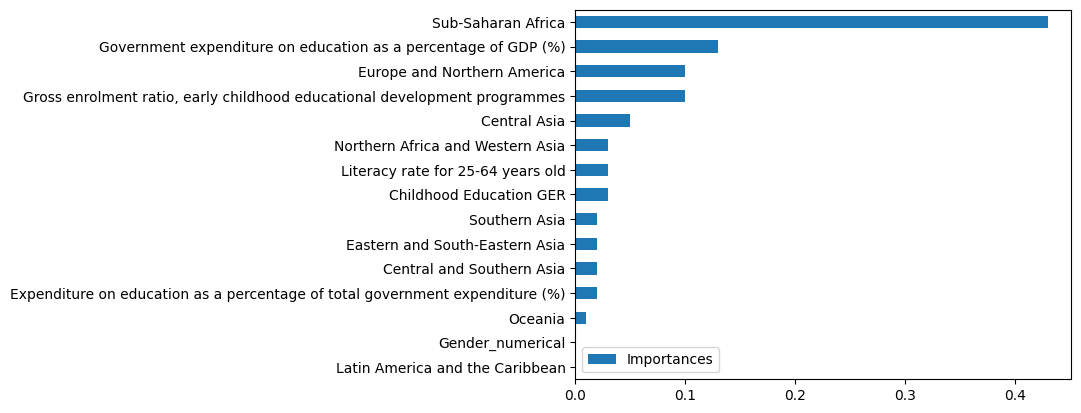

In [33]:
feat_imp4.sort_values(by='Importances', ascending=True).plot(kind='barh');

**Models Perfomances Comparison**

In [34]:
# Concatenate all the models perfomance together
results = pd.concat([results,model_results_2, model_results_3,  model_results_4, model_results_5], ignore_index=True)
results.head()


,Model,MAE,MSE,RMSE,RSS,r2_score
0,Linear regression,0.161718,0.042506,0.206171,117.86372,0.664007
1,Decision Tree Regressor,0.072284,0.020545,0.143336,117.86372,0.664007
2,Random Forest Regressor,0.067228,0.014319,0.119660,117.86372,0.664007
3,K-Nearest Neighbors Regressor,0.093371,0.023660,0.153818,117.86372,0.664007
4,Gradient Boosting Regressor,0.104546,0.019774,0.140621,117.86372,0.664007


**Models Perfomance Interpretation**

All the employed model algorithms exhibit identical values for the RSS and r2_score metrics. Therefore, it becomes imperative to employ alternative model evaluation metrics in order to determine the optimal performing model.

Upon reviewing the provided table, it is evident that the Random Forest Regressor yields the lowest values for both Mean Absolute Error (MAE) and Mean Square Error (MSE). As our objective is to minimize errors to the greatest extent possible, we can confidently identify the Random Forest Regressor as the top-performing model in this context.

**Conclusion**

Following a thorough evaluation of different model performances, we've opted for the Model 3(Random Forest Regressor) as the standout performer. This model will be preserved by saving it as a "pickle" file, serving as the foundation for deploying our solution.

**Saving the best performed model (Random Forest Regressor)**

In [35]:
import pickle

# Your trained model (replace with your actual model)
selected_model = rf_regressor

# Save the model to a file using pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(selected_model, file)
